# Cuaderno misceláneo de notas

In [1]:
import sympy as sym

z, t, birth, death, init_size = sym.symbols('z t b d n_0')

f = ((1-death*((z-1)/(birth*z - death))*sym.exp((birth - death)*t))/(1-((z-1)/(birth*z - death))*sym.exp((birth - death)*t)))

In [ ]:
f = sym.simplify(f)
f

In [16]:
taylor = f.series(z, 0, n=4).removeO()

taylor

-d*exp(t*(b - d))/(d - exp(b*t - d*t)) + d/(d - exp(b*t - d*t)) + z**3*(-b*(-b/(d - exp(t*(b - d))) + exp(t*(b - d))/(d - exp(t*(b - d))))**2/(d - exp(b*t - d*t)) + d*(-b/(d - exp(t*(b - d))) + exp(t*(b - d))/(d - exp(t*(b - d))))**3*exp(t*(b - d))/(d - exp(b*t - d*t)) - d*(-b/(d - exp(t*(b - d))) + exp(t*(b - d))/(d - exp(t*(b - d))))**3/(d - exp(b*t - d*t)) + d*(-b/(d - exp(t*(b - d))) + exp(t*(b - d))/(d - exp(t*(b - d))))**2*exp(t*(b - d))/(d - exp(b*t - d*t))) + z**2*(-b*(b/(d - exp(t*(b - d))) - exp(t*(b - d))/(d - exp(t*(b - d))))/(d - exp(b*t - d*t)) - d*(-b/(d - exp(t*(b - d))) + exp(t*(b - d))/(d - exp(t*(b - d))))**2*exp(t*(b - d))/(d - exp(b*t - d*t)) + d*(-b/(d - exp(t*(b - d))) + exp(t*(b - d))/(d - exp(t*(b - d))))**2/(d - exp(b*t - d*t)) + d*(b/(d - exp(t*(b - d))) - exp(t*(b - d))/(d - exp(t*(b - d))))*exp(t*(b - d))/(d - exp(b*t - d*t))) + z*(-b/(d - exp(b*t - d*t)) - d*(b/(d - exp(t*(b - d))) - exp(t*(b - d))/(d - exp(t*(b - d))))*exp(t*(b - d))/(d - exp(b*t - d*t)) 

In [20]:
simptaylor = sym.simplify(taylor)
simptaylor

(d*(1 - exp(t*(b - d)))*(d - exp(t*(b - d)))**3 + z**3*(b - exp(t*(b - d)))**2*(d*(1 - exp(t*(b - d)))*(b - exp(t*(b - d))) + (-b + d*exp(t*(b - d)))*(d - exp(t*(b - d)))) + z**2*(b - exp(t*(b - d)))*(d - exp(t*(b - d)))*(d*(1 - exp(t*(b - d)))*(b - exp(t*(b - d))) + (-b + d*exp(t*(b - d)))*(d - exp(t*(b - d)))) - z*(d - exp(t*(b - d)))**2*(-d*(1 - exp(t*(b - d)))*(b - exp(t*(b - d))) + (b - d*exp(t*(b - d)))*(d - exp(t*(b - d)))))/(d - exp(t*(b - d)))**4

In [21]:
coefficients = [simptaylor.coeff(z, n) for n in range(4)]
coefficients

[0, 0, 0, 0]

#### Extensión del modelo a los clones de tamaño 1:

Yo cuando chico en verdad me encantaban los clones de tamaño 1, mi familia siempre me decía oye Migue tu ¿cuándo vas a dejar de fitear cosas considerando los clones de tamaño 1? Y yo decía "¡Nunca!". Por eso, en este cuaderno vamos a extender el modelo a los clones de tamaño 1.

In [ ]:
import crit_size_model as csm
import exp_sum_model as esm
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# ¿Por qué hay comportamiento suave?

En el modelo nulo deberíamos ver una recta. Al simular el modelo alterado, por chance hay unos clones que llegan ants al tamaño crítico. el comportamiento suave es por que la heaviside depende del n(t), que es una variable aleatoria. El tiempo donde se alcanza el tamaño n debería distribuir como una gamma. Algunos clones transitan antes que otros, y contribuyen de distinta manera a la cola.

# ¿Cómo asegurar un n_crítico decente?

Puedo correr la optimización con un rango de n_crit iniciales, x ej +- 50%, y ver cuál resulta mejor (rscore). Como no son tantos, debería ser posible.

Si tengo un rango muy amplio, puedo hacer un sampleo o algo así. Para esto no debería ser necesario.

# Tema biexponencial:

Hay que iniciar el modelo con una fracción de cada población. Esto estaba en el suplemento del artículo en Nature.

Modelo: Fracción de población, nacimiento1, nacimiento2.

Lo hago evolucionar, después ajusto esto.

También es analítica, hay que ver lo del artículo (con r = 1, o 0), esto ajustarlo. Puedo basarme en los resultados de mi modelo. (nacimiento de 1 población: birth_rate, nacimiento de 2: birth_rate*delta, fs es el intercepto de la cola con el eje y).

Lo más seguro es que ajuste bien. Hay que usar argumentos experimentales para justificar nuestro modelo. Es poco probable que sean mutaciones porque vemos una distribución exponencial de la cola. 

Si fueran mutaciones, la capacidad de mutar debería ser similar. No se verían 2 comportamientos. Se vería una ley de potencia (clones más grandes tienden a crecer más rápido y mutar más) (pedir ayuda a Bordeu).

# Distribución de probabilidad inicial

Podríamos ver qué onda con una distribución inicial distinta de $\delta_{0,i}$. Esto podría ser por ejemplo tomar el primer día como distribución inicial y ver ahí.

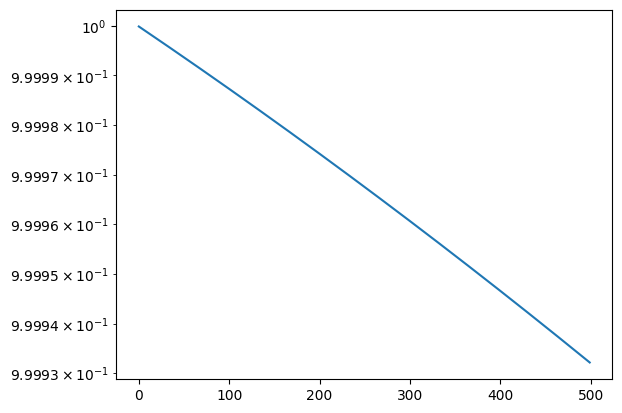

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import birdepy as bd

# Initial distribution:
lam = 10.0
poisson_dist_sizes = np.arange(1, 101)
poisson_probs = [lam**n * np.exp(-lam) / np.math.factorial(n) for n in poisson_dist_sizes]


init_dist_sizes = [1, 100]
init_dist_probs = [0.99, 0.1]

# Parameters for a linear BDP:
birth_rate = 1
death_rate = 0.1

params = [birth_rate, death_rate]

# Probability density matrix for init_dist_sizes:

def linear_probability_matrix(init_dist_sizes, init_dist_probs, time, params, nmin=1, nmax=1000, method='expm', **kwargs):
    """
    Probability density matrix for linear BDP.
    """
    n = np.arange(nmin, nmax+1)
    temp_p = bd.probability(init_dist_sizes, n, time, params, model='linear', method=method, **kwargs)
    p = np.zeros(nmax)
    for index, prob in enumerate(init_dist_probs):
        p += temp_p[index].T * prob

    return p.T

if __name__ == "__main__":
    plt.plot((1-np.cumsum(linear_probability_matrix(poisson_dist_sizes, poisson_probs, 10, params, nmin=1, nmax=500, method='expm')))[0:500])
    plt.yscale('log')
    plt.show()


# Para la presentación final:

- Explicar la física detrás de los modelos (ver Steffan Rulands - modelo de aerosoles)

- Ver el primer momento de los clones en función del tiempo (observable independiente de la distribución de clones, puedo tener 2 distribuciones distintas con promedios similares). Así podría evaluar los modelos también.

- Contar la historia de comparar 2 tipos de poblaciones con 1 población con tamaño crítico. La dependencia tiene que ser en el tiempo, no en el tamaño crítico. (argumento heurístico: al final del primer intervalo de tiempo voy a tener una dist exponencial. Luego parte un proceso nuevo con una dist inicial exponencial. Con lo de poisson, veo que sigo con una exponencial) (También puedo justificar con Chapman Kolmogorov). Con el tiempo cambiaría la pendiente, pero no aparece una 2da distribución.



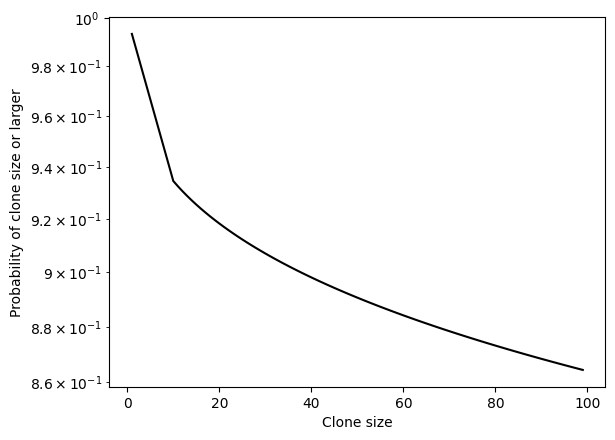

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.stats import nbinom

def birth_death_pmf(nbirths, t, birth_rate, n0):
    return nbinom.pmf(nbirths, n0, np.exp(-birth_rate*t))




def probability(n, t, birth_rate_1, birth_rate_2, ncrit):
    """
    Probability of a clone of size n at time t.

    Parameters:
    n (int): The size of the clone.
    t (float): The time to compute the probability at.
    ncrit (int): The critical size of the clone.

    Returns:
    float: The probability of a clone of size n at time t.
    """
    if n <= ncrit:
        return np.exp(-birth_rate_1*t)*(1 - np.exp(-birth_rate_1*t))**(n - 1)
    else:
        integrand = lambda x: birth_death_pmf(ncrit, x, birth_rate_1, 1)*birth_death_pmf(n-ncrit, t-x, birth_rate_2, ncrit)
        return quad(integrand, 0, t)[0]


plt.clf()
plt.plot(np.arange(1, 100), 1-np.cumsum([probability(n, 50, 0.1, 0.3, 10) for n in np.arange(1,100)]), color='black')
plt.yscale('log')
plt.xlabel('Clone size')
plt.ylabel('Probability of clone size or larger')
plt.show()